# Importation des données


In [92]:
import pickle

MAIN_PATH = './data/prepared_data/'
ETHICAL_PATH = MAIN_PATH + 'ethical/'


def load_pickle(path: str):
    """
    Load a pickle file.

    Parameters
    ----------
    path : str
        Path to the pickle file.

    Returns
    -------
    object
        The object stored in the pickle file.
    """
    with open(path, 'rb') as f:
        return pickle.load(f)


# Load data
X_ethical_train = load_pickle(ETHICAL_PATH + 'X_ethical_train.pkl')
X_ethical_test = load_pickle(ETHICAL_PATH + 'X_ethical_test.pkl')
Y_ethical_train = load_pickle(ETHICAL_PATH + 'Y_ethical_train.pkl')
Y_ethical_test = load_pickle(ETHICAL_PATH + 'Y_ethical_test.pkl')

# Entrainement des modèles


## SGD Classifier


In [93]:
from sklearn.linear_model import SGDClassifier

# Instantiate classifier
sgd_clf = SGDClassifier(random_state=42)

# Fit classifier
sgd_clf.fit(X_ethical_train, Y_ethical_train)


SGDClassifier(random_state=42)

In [94]:
from sklearn.model_selection import cross_val_score

# Cross-validate classifier
cross_val_score(sgd_clf, X_ethical_train,
                Y_ethical_train, cv=3, scoring="accuracy")

array([0.82908163, 0.81207483, 0.79676871])

In [95]:
from sklearn.model_selection import cross_val_predict

# Cross-validate classifier
y_train_pred = cross_val_predict(
    sgd_clf, X_ethical_train, Y_ethical_train, cv=3)

In [96]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision
precision_score(Y_ethical_train, y_train_pred)


0.4012875536480687

In [97]:
# Calculate recall
recall_score(Y_ethical_train, y_train_pred)


0.3286467486818981

In [98]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1_score(Y_ethical_train, y_train_pred)


0.36135265700483093

In [99]:
from sklearn.metrics import precision_recall_curve

# Show the precision/recall curve
y_scores = cross_val_predict(sgd_clf, X_ethical_train, Y_ethical_train,
                             cv=3, method="decision_function")

precision, recall, thresholds = precision_recall_curve(
    Y_ethical_train, y_scores)

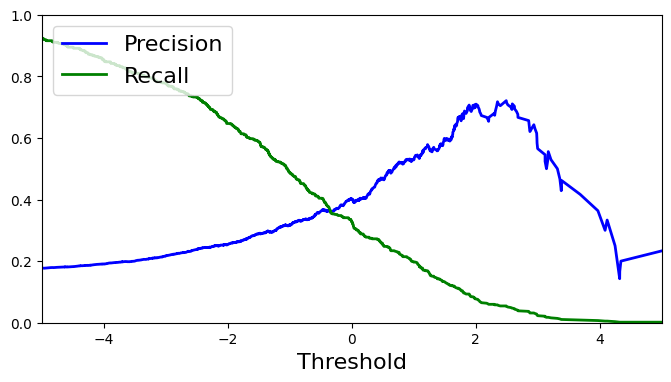

In [100]:
from matplotlib import pyplot as plt


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])


plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.xlim([-5, 5])
plt.show()

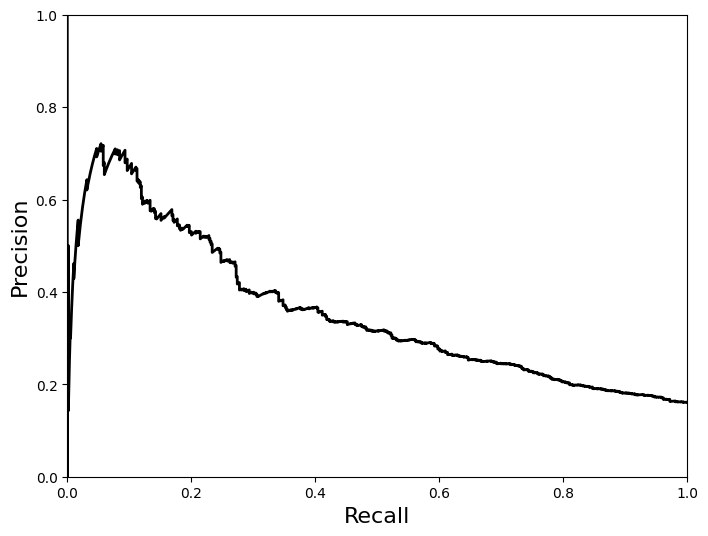

In [101]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])


plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precision, recall)
plt.show()

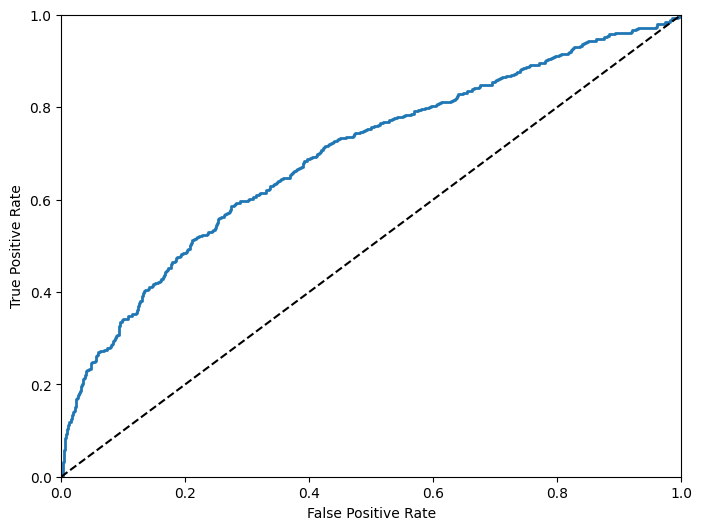

In [102]:
from sklearn.metrics import roc_curve

# Show the ROC curve
fpr, tpr, thresholds = roc_curve(Y_ethical_train, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [103]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
roc_auc_score(Y_ethical_train, y_scores)


0.6952409348382197

## Random Forest


In [104]:
from sklearn.ensemble import RandomForestClassifier
from time import time

start = time()

# Instantiate classifier
forest_clf = RandomForestClassifier(
    random_state=42, n_estimators=500, max_depth=50)

# Fit classifier
forest_clf.fit(X_ethical_train, Y_ethical_train)

y_probas_forest = cross_val_predict(forest_clf, X_ethical_train, Y_ethical_train, cv=3,
                                    method="predict_proba")

TIME_FOREST = ["Random Forest", time() - start]

In [105]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(
    Y_ethical_train, y_scores_forest)

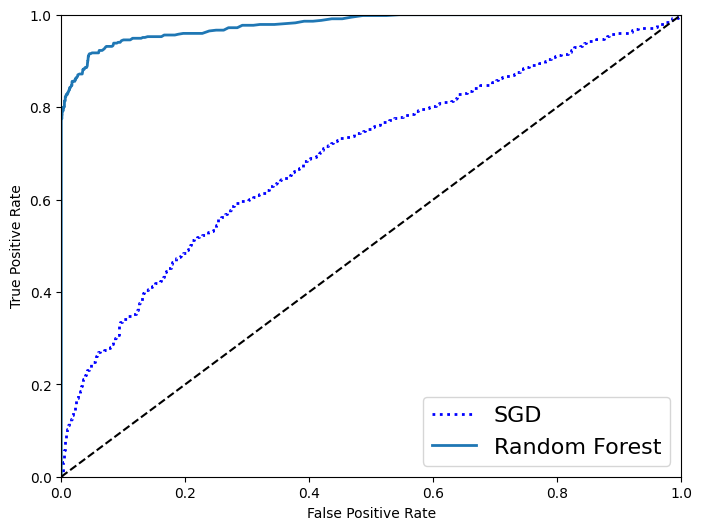

In [106]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()


In [107]:
# Calculate AUC
roc_auc_score(Y_ethical_train, y_scores_forest)


0.9786202292490634

In [108]:
# Show the precision/recall curve
y_scores_forest = forest_clf.predict_proba(X_ethical_test)[:, 1]

precision_forest, recall_forest, thresholds_forest = precision_recall_curve(
    Y_ethical_test, y_scores_forest)

In [109]:
# Précision moyenne
precision_forest.mean()

0.7526825291258931

In [110]:
# Rappel moyen
recall_forest.mean()

0.7470657276995306

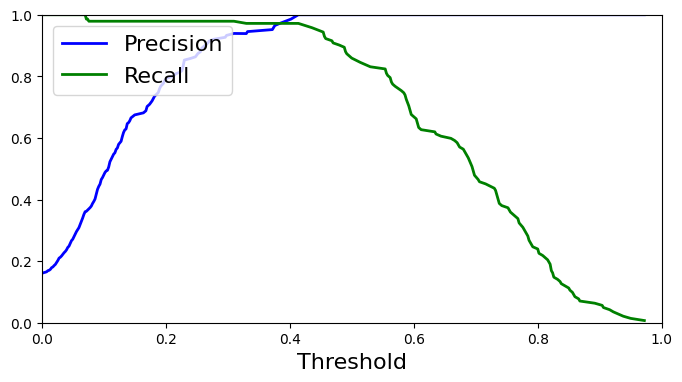

In [111]:
# Show the precision/recall curve
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(
    precision_forest, recall_forest, thresholds_forest)
plt.xlim([0.0, 1.0])
plt.show()

## Régression Logistique


In [112]:
from sklearn.linear_model import LogisticRegression

start = time()

# Instantiate classifier
log_clf = LogisticRegression(random_state=42)

# Fit classifier
log_clf.fit(X_ethical_train, Y_ethical_train)

TIME_LOG = ["Logistic Regression", time() - start]


c:\Users\mathi\OneDrive\Documents\Cours\CESI\2eme année\IA\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
# Cross-validate
y_probas_log = cross_val_predict(log_clf, X_ethical_train, Y_ethical_train, cv=3,
                                 method="predict_proba")

y_scores_log = y_probas_log[:, 1]
fpr_log, tpr_log, thresholds_log = roc_curve(Y_ethical_train, y_scores_log)

c:\Users\mathi\OneDrive\Documents\Cours\CESI\2eme année\IA\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mathi\OneDrive\Documents\Cours\CESI\2eme année\IA\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

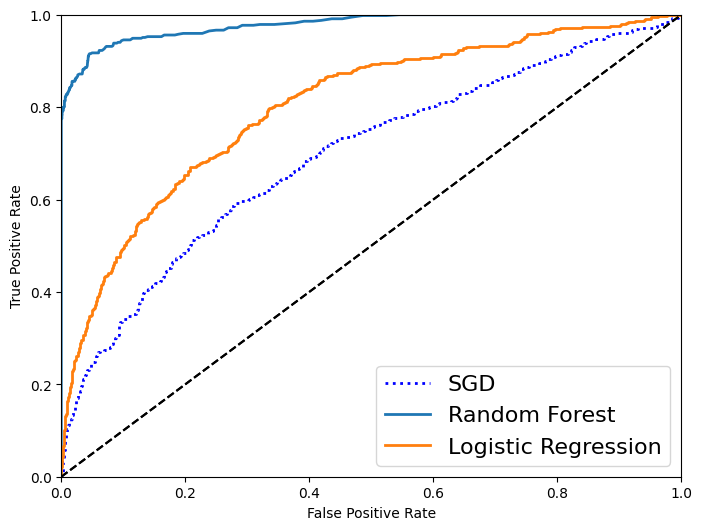

In [114]:
# Show the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_log, tpr_log, "Logistic Regression")
plt.legend(loc="lower right", fontsize=16)
plt.show()


In [115]:
# Calculate AUC
roc_auc_score(Y_ethical_train, y_scores_log)


0.8022119523351059

In [116]:
# Calculate precision
precision_score(Y_ethical_train, y_train_pred)


0.4012875536480687

In [117]:
# Calculate recall
recall_score(Y_ethical_train, y_train_pred)


0.3286467486818981

In [118]:
# Calculate F1 score
f1_score(Y_ethical_train, y_train_pred)


0.36135265700483093

In [119]:
# Show the precision/recall curve
y_scores_log = cross_val_predict(log_clf, X_ethical_train, Y_ethical_train, cv=3,
                                 method="decision_function")

precision_log, recall_log, thresholds_log = precision_recall_curve(
    Y_ethical_train, y_scores_log)

c:\Users\mathi\OneDrive\Documents\Cours\CESI\2eme année\IA\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mathi\OneDrive\Documents\Cours\CESI\2eme année\IA\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

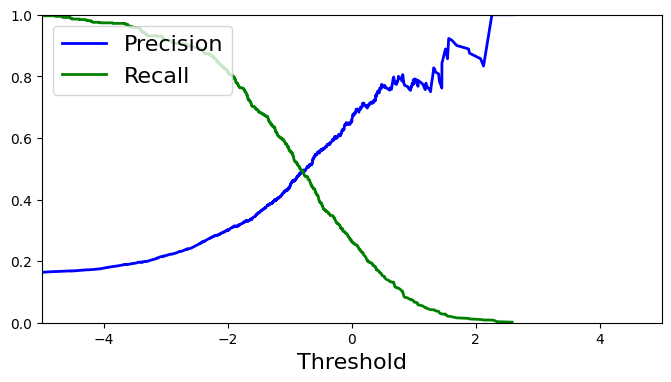

In [120]:
# Show the precision/recall curve
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precision_log, recall_log, thresholds_log)
plt.xlim([-5, 5])
plt.show()


## Perceptron


In [121]:
from sklearn.linear_model import Perceptron

start = time()

# Instantiate classifier
per_clf = Perceptron(random_state=42, max_iter=1000)

# Fit classifier
per_clf.fit(X_ethical_train, Y_ethical_train)

TIME_PER = ["Perceptron", time() - start]


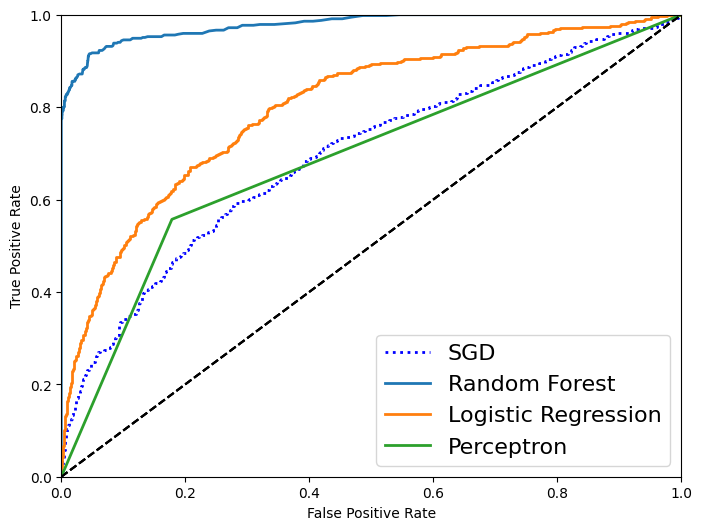

In [122]:
# Show the ROC curve
fpr_per, tpr_per, thresholds_per = roc_curve(
    Y_ethical_train, per_clf.predict(X_ethical_train))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_log, tpr_log, "Logistic Regression")
plot_roc_curve(fpr_per, tpr_per, "Perceptron")
plt.legend(loc="lower right", fontsize=16)
plt.show()

# Amélioration Continue


Étant donnée les résultats obtenues précédents, il a été décidé que l'algorithme choisi pour traiter nos données seraient le RandomForest Classifier. Cependant, les tests effectués ne sont pas suffisants pour déterminer si le modèle est optimal, étant donné la prise en compte de paramètres par défaut pour tester l'efficatité des divers algorithmes en fonction d'un même jeu de donnée. Il est donc nécessaire de continuer à améliorer le modèle. Dans notre cas, il y a plusieurs stratégies qui peuvent être mises en place pour améliorer continuellement la performance de notre algorithme :

1. Collecter et ajouter de nouvelles données : L'ajout de nouvelles données peut aider à améliorer la performance de l'algorithme en fournissant de nouvelles informations qui n'étaient pas disponibles dans les données précédentes. Il est important de s'assurer que les nouvelles données sont cohérentes avec les données précédentes et qu'elles couvrent les mêmes variables pour éviter tout biais dans l'analyse.

2. Optimiser les hyperparamètres : Les hyperparamètres tels que le nombre d'arbres, la profondeur de chaque arbre, la fraction d'échantillons à utiliser pour l'apprentissage, etc. peuvent être optimisés pour améliorer la performance de l'algorithme. Il est important d'essayer différentes combinaisons d'hyperparamètres et d'utiliser une validation croisée pour évaluer leur performance.

3. Utiliser des techniques de prétraitement des données : Les techniques de prétraitement des données telles que la normalisation, la standardisation, la sélection de variables, etc. peuvent aider à améliorer la performance de l'algorithme. Il est important d'expérimenter différentes techniques pour voir lesquelles fonctionnent le mieux pour les données spécifiques.

4. Effectuer une analyse post-mortem : L'analyse post-mortem est une technique qui consiste à analyser les erreurs de prédiction pour identifier les erreurs les plus fréquentes et les raisons pour lesquelles elles se produisent. Cette analyse peut aider à identifier les faiblesses de l'algorithme et à prendre des mesures pour les corriger.

5. Utiliser d'autres algorithmes : L'algorithme Random Forest est un bon choix pour la prédiction de la cause de départ des employés, mais il existe d'autres algorithmes tels que la régression logistique, les machines à vecteurs de support (SVM) ou les réseaux de neurones qui peuvent être utilisés pour améliorer la performance de la prédiction.


Les éléments qui peuvent être implémentés dans notre cas ou même retravaillé sont les suivants :

- Optimisation des hyperparamètres : Nous avons utilisé des hyperparamètres par défaut pour pouvoir comparer nos algorithmes, mais nous devons essayer d'autres combinaisons d'hyperparamètres pour voir si nous pouvons améliorer la performance de l'algorithme. Nous pouvons également utiliser une validation croisée pour évaluer la performance de chaque combinaison d'hyperparamètres.


In [123]:
# Importer la classe GridSearchCV pour la validation croisée et la recherche des meilleurs hyperparamètres
from sklearn.model_selection import GridSearchCV

# Définir les valeurs possibles pour chaque hyperparamètre
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [5, 10, 20, 50, 100],
}

# Créer un objet GridSearchCV avec la classe Random Forest et les hyperparamètres définis
grid_search = GridSearchCV(estimator=forest_clf, param_grid=param_grid, cv=5)

# Exécuter la recherche des meilleurs hyperparamètres avec les données existantes
grid_search.fit(X_ethical_train, Y_ethical_train)

# Afficher les meilleurs hyperparamètres
grid_search.best_params_


{'max_depth': 20, 'n_estimators': 100}

- Analyse post-mortem : Nous pouvons analyser les erreurs de prédiction pour identifier les erreurs les plus fréquentes et les raisons pour lesquelles elles se produisent. Cette analyse peut nous aider à identifier les faiblesses de l'algorithme et à prendre des mesures pour les corriger.

- Changer les techniques de prétraitement des données : Nous pouvons essayer d'autres techniques de prétraitement des données pour voir si nous pouvons améliorer la performance de l'algorithme.


# Étude des résultats


Le `RandomForestClassifier` est le modèle qui a les meilleurs performances sur les données de test. Il est donc choisi pour la suite de l'étude.


On cherche à présent à savoir sur quel critère le modèle se base pour prédire si un employé va partir ou non l'année suivante.


In [124]:
import time
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd


def plot_feature_importances(X: pd.DataFrame, y: pd.DataFrame, title: str):
    """
    Plot the feature importances.

    Parameters
    ----------
    X : pandas.DataFrame
        The data to plot the feature importances.

    y : pandas.DataFrame
        The target to plot the feature importances.

    title : str
        The title of the plot.

    Returns
    -------
    None
    """
    feature_names = X.columns
    forest = RandomForestClassifier(random_state=42)
    forest.fit(X, y)

    start_time = time.time()
    importances = forest.feature_importances_
    std = np.std(
        [tree.feature_importances_ for tree in forest.estimators_], axis=0)
    elapsed_time = time.time() - start_time

    print(
        f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
    forest_importances = pd.Series(importances, index=feature_names)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Mean decrease in impurity")
    fig.set_size_inches(10, 10)
    # Draw line at 0.01 threshold
    ax.axhline(y=0.05, linestyle='--', color='r')
    fig.tight_layout()

Elapsed time to compute the importances: 0.005 seconds


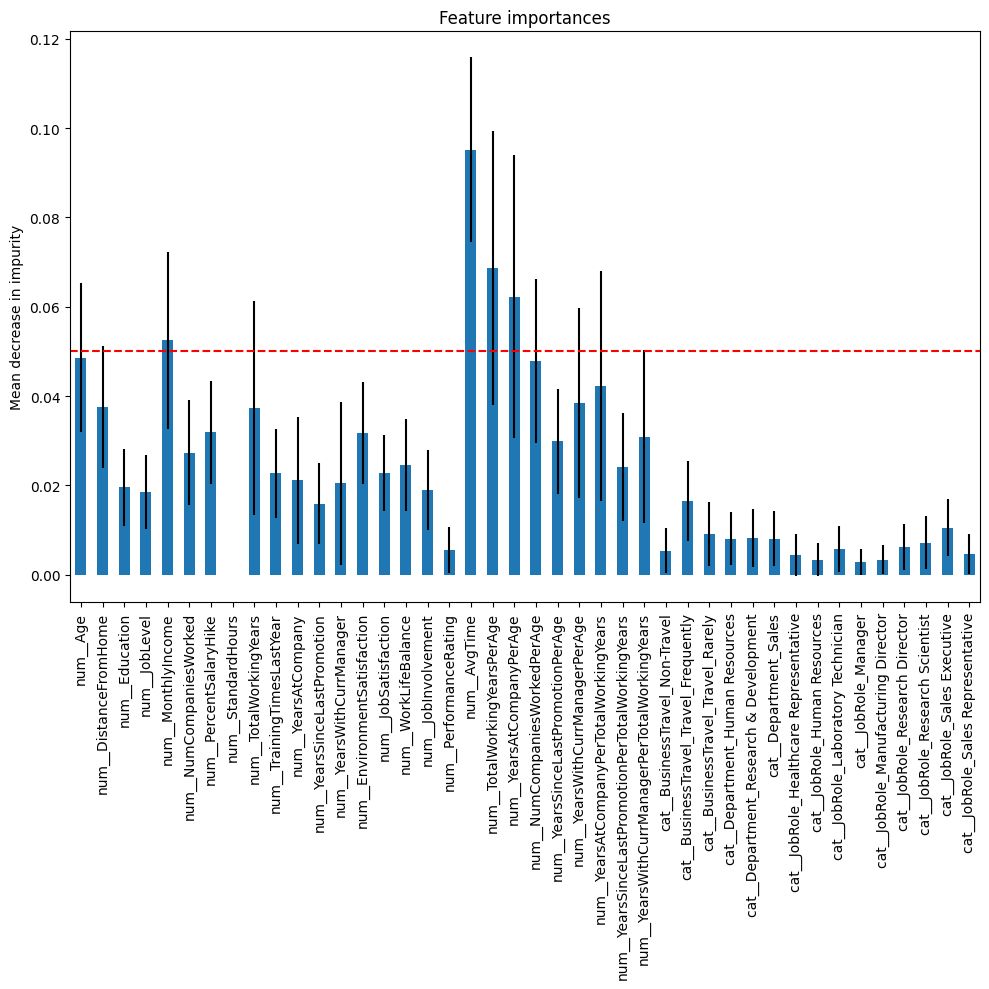

In [125]:
import numpy as np
from sklearn.inspection import PartialDependenceDisplay

# Analyser l'importance des variables
importances = forest_clf.feature_importances_
indices = np.argsort(importances)[::-1]
plot_feature_importances(
    X_ethical_train, Y_ethical_train, "Feature importances")

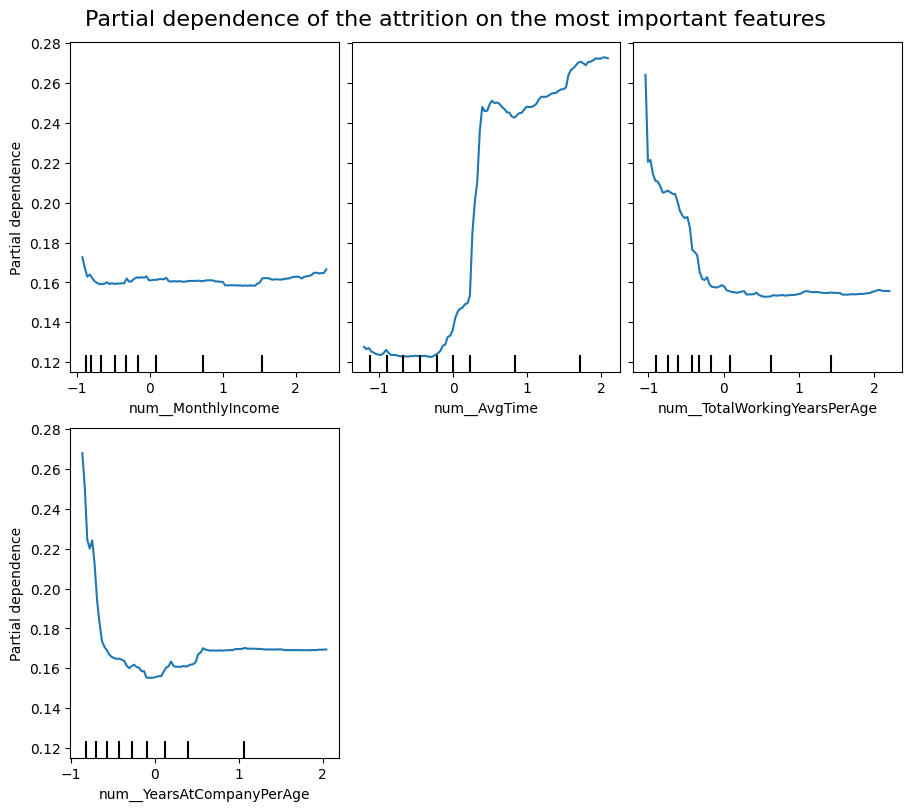

In [126]:
# Identifier les variables significatives
significant_features = X_ethical_train.columns[importances > 0.05]

# Examiner les interactions entre les variables
# plot_partial_dependence(forest_clf, X_useful_train, significant_features)
_, ax = plt.subplots(figsize=(9, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    forest_clf,
    X_ethical_train,
    significant_features,
    ax=ax
)
_ = display.figure_.suptitle(
    "Partial dependence of the attrition on the most important features",
    fontsize=16,
)

# Interpréter les résultats
predictions = forest_clf.predict(X_ethical_test)

In [127]:
from sklearn.metrics import classification_report
print(classification_report(Y_ethical_test, predictions))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       740
           1       1.00      0.85      0.92       142

    accuracy                           0.98       882
   macro avg       0.99      0.92      0.95       882
weighted avg       0.98      0.98      0.97       882



## Etude comparative de temps de calcul


In [128]:
def compare_time(*args):
    print("Time elapsed:")
    for arg in args:
        print(f"- {arg[0]}: {arg[1]:.3f} seconds")


compare_time(TIME_FOREST, TIME_PER, TIME_LOG)

Time elapsed:
- Random Forest: 10.592 seconds
- Perceptron: 0.006 seconds
- Logistic Regression: 0.074 seconds
